In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [2]:
data = pd.read_csv("data.csv")
data

,Channel,Energy,Alpha Channel Counts,Channel.1,Energy.1,Gamma Channel Counts,Unnamed: 6,Timestamp,Coinciding Alpha,CA Energy,Coinciding Gamma,CG Energy
0,100.0,5365.2580,672.0,100.0,9.07428,2039.0,NaN,0.845,85,5356.7065,718,60.75144
1,101.0,5365.8281,673.0,101.0,9.15790,2014.0,NaN,0.176,371,5519.7551,349,29.89566
2,102.0,5366.3982,629.0,102.0,9.24152,2073.0,NaN,0.170,340,5502.0820,1023,86.25554
3,103.0,5366.9683,590.0,103.0,9.32514,2119.0,NaN,0.273,270,5462.1750,324,27.80516
4,104.0,5367.5384,652.0,104.0,9.40876,2029.0,NaN,0.516,343,5503.7923,1023,86.25554
...,...,...,...,...,...,...,...,...,...,...,...,...
11426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,294,5475.8574,748,63.26004
11427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.345,254,5453.0534,292,25.12932
11428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.048,415,5544.8395,1023,86.25554
11429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500,305,5482.1285,726,61.42040


In [3]:
dt = data.to_numpy()
cge = data['CG Energy'].to_numpy()
cae = data['CA Energy'].to_numpy()

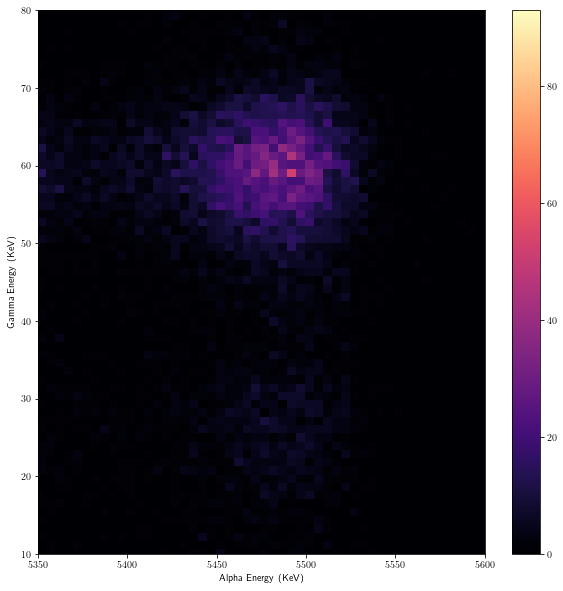

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel(r'Alpha Energy (KeV)')
plt.ylabel(r'Gamma Energy (KeV)')
h = plt.hist2d(cae, cge, bins=80, cmap='magma')
plt.ylim(10, 80)
plt.xlim(5350, 5600)
plt.colorbar(h[3])
plt.savefig("hmap.pdf")

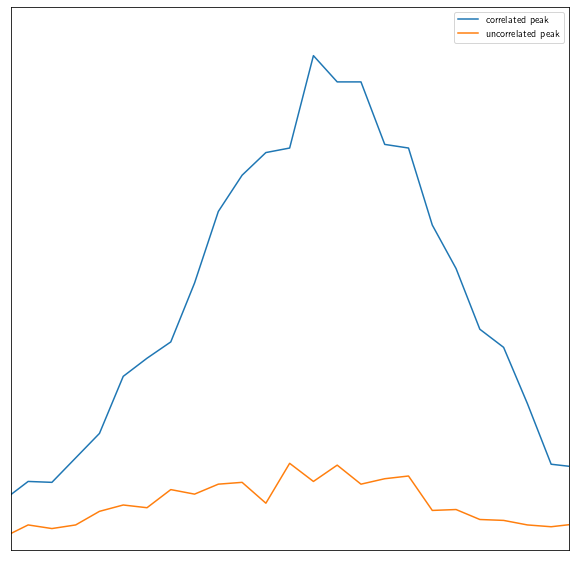

In [53]:
import matplotlib.ticker as ticker
ax = plt.axes()
# plt.imshow(h[0])
focussed = h[0][10:50, 40:70]
unfocussed = h[0][10:50, 10:40]
# plt.imshow(focussed)

# x = h[1][10:50]
x = h[2][40:70]
y = np.sum(focussed, axis=0)
uny = np.sum(unfocussed, axis=0)
plt.plot(x, y, label=r'correlated peak')
plt.plot(x, uny, label=r'uncorrelated peak')
plt.xlim(45, 70)
plt.ylim(0, 600)
plt.legend()
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
plt.savefig("corr.pgf")

In [50]:
# functions
def gaussian(x, a, b, c, d):
    return a*np.exp((-(x-b)**2)/2*(c**2)) + d
def tgauss(x,a,b,c,a1,b1,c1,d):
    return a*np.exp((-(x-b)**2)/2*(c**2)) + a1*np.exp((-(x-b1)**2)/2*(c1**2)) + d
def mgauss(x,a,b,c,a1,b1,c1,a2,b2,c2,a3,b3,c3,d):
    return a*np.exp((-(x-b)**2)/2*(c**2)) + a1*np.exp((-(x-b1)**2)/2*(c1**2)) + a2*np.exp((-(x-b2)**2)/2*(c2**2)) + a3*np.exp((-(x-b3)**2)/2*(c3**2)) +  d

In [51]:
# Alpha
alp_en = data['Energy'].dropna().to_numpy()
alp_ct = data['Alpha Channel Counts'].dropna().to_numpy()
popt, pconv = fit(tgauss, alp_en, alp_ct, p0=[100000, 5400, 1, 10000, 5500, 1, 0])

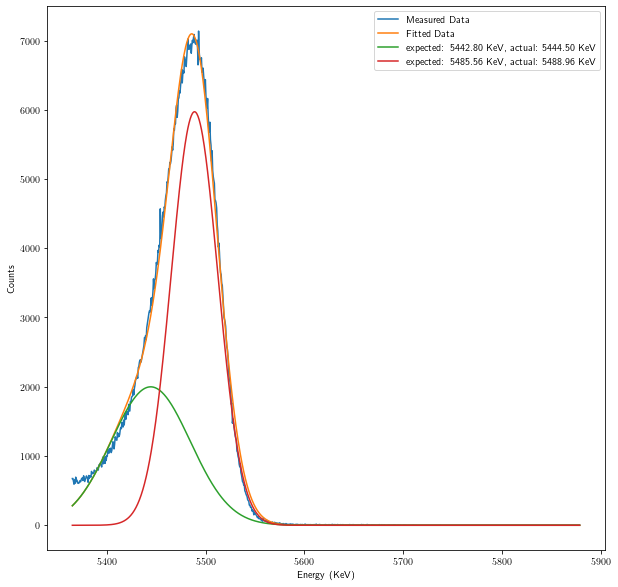

In [52]:
plt.plot(alp_en, alp_ct, label=r"Measured Data")
plt.plot(alp_en, tgauss(alp_en, *popt), label=r"Fitted Data")
plt.plot(alp_en, gaussian(alp_en, popt[0], popt[1], popt[2], popt[6]), label=r"expected: 5442.80 KeV, actual: 5444.50 KeV")
plt.plot(alp_en, gaussian(alp_en, popt[3], popt[4], popt[5], popt[6]), label=r"expected: 5485.56 KeV, actual: 5488.96 KeV")
plt.xlabel(r'Energy (KeV)')
plt.ylabel(r'Counts')
plt.legend()
plt.savefig("alpha.pgf")

In [53]:
# Gamma
gam_en = data['Channel.1'].dropna()
gam_en_r = data['Energy.1'].dropna()
gam_ct = data['Gamma Channel Counts'].dropna()
popt, pconv = fit(mgauss, gam_en[1:], gam_ct[1:], p0=[10000, 300, 0, 10000, 300, 0, 10000, 300, 0, 70000, 700, 1, 0])
# popt

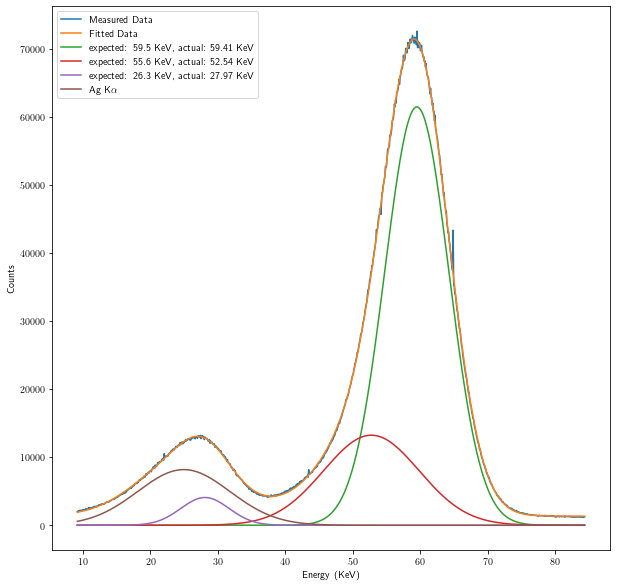

In [54]:
plt.plot(gam_en_r[1:], gam_ct[1:], label=r"Measured Data")
plt.plot(gam_en_r[1:], mgauss(gam_en[1:], *popt), label=r"Fitted Data")
plt.plot(gam_en_r[1:], gaussian(gam_en[1:], popt[9], popt[10], popt[11], 0), label=r"expected: 59.5 KeV, actual: 59.41 KeV")
plt.plot(gam_en_r[1:], gaussian(gam_en[1:], popt[0], popt[1], popt[2], 0), label=r"expected: 55.6 KeV, actual: 52.54 KeV")
plt.plot(gam_en_r[1:], gaussian(gam_en[1:], popt[3], popt[4], popt[5], 0), label=r"expected: 26.3 KeV, actual: 27.97 KeV")
plt.plot(gam_en_r[1:], gaussian(gam_en[1:], popt[6], popt[7], popt[8], 0), label=r"Ag K$\alpha$")
plt.xlabel(r'Energy (KeV)')
plt.ylabel(r'Counts')
plt.legend()
plt.savefig("gamma.pgf")